In [1]:
#Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

- I used "Telco Customer Churn" dataset, which contains information about customers of a telecom company. The dataset includes various features such as customer demographics, account information, and services used, as well as a label indicating whether the customer churned or not.
- The problem is a binary classification task, where the goal is to predict whether a customer will churn (1) or not churn (0) based on the features provided in the dataset.

In [2]:
# The features in the dataset are separated by (',').
df = pd.read_csv('Telco-Customer-Churn.csv', sep=',')

# Display the first 5 records
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Display comprehensive information about the DataFrame 'df' to gain insights into its structure and content.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Compute summary statistics for all columns in 'df', including both numeric and non-numeric data,
# using 'describe' with 'include="all"'. This includes counts, unique values, and top frequencies for categorical data,
# and mean, standard deviation, min, and max for numeric data. Transpose (T) the result for better readability,

statistics = df.describe(include='all').round(3).T
statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162,0.369,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371,24.559,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Check nulls
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Replace empty strings with NaN
df['TotalCharges'].replace(" ", np.nan, inplace=True)

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values in 'TotalCharges' with the median or mean
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/var/folders/rk/jdn7ny3s5pz59wz4cb1y33q40000gn/T/ipykernel_50141/1429862244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].replace(" ", np.nan, inplace=True)
/var/folders/rk/jdn7ny3s5pz59wz4cb1y33q40000gn/T/ipykernel_50141/1429862244.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [7]:
# Drop the 'customerID' feature, inplace, since it is irrelevant to the customer segmentation process
df.drop('customerID',axis=1, inplace=True)

In [8]:
# Convert categorical columns into dummy variables
categorical_cols = ['Partner', 'Dependents', 'PhoneService','PaperlessBilling', 'Churn']

In [9]:
df[categorical_cols] = df[categorical_cols].replace({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0) #For gender if it's Female -> 1 Male -> 0

/var/folders/rk/jdn7ny3s5pz59wz4cb1y33q40000gn/T/ipykernel_50141/2317241314.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_cols] = df[categorical_cols].replace({'Yes': 1, 'No': 0})


In [10]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
gender,1,0,0,0,1,1,0,1,1,0,...,0,1,0,1,1,0,1,1,0,0
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,0
Dependents,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,1,0,0
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,0,1,1,0,1,1,1,0,1,1,...,1,1,1,0,1,1,1,0,1,1
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes
OnlineBackup,Yes,No,Yes,No,No,No,Yes,No,No,Yes,...,No,Yes,No,Yes,No internet service,No,Yes,No,No,No


In [11]:
#These categorical columns has more than 2 different values so we will apply one-hot encoding
df_encoding = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

In [12]:
# Apply one-hot encoding
one_hot_encoded_df = pd.get_dummies(df, columns= df_encoding)
one_hot_encoded_df = one_hot_encoded_df.replace({'True': 1, 'False': 0})
one_hot_encoded_df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
gender,1,0,0,0,1,1,0,1,1,0,...,0,1,0,1,1,0,1,1,0,0
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,0
Dependents,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,1,0,0
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,0,1,1,0,1,1,1,0,1,1,...,1,1,1,0,1,1,1,0,1,1
PaperlessBilling,1,0,1,0,1,1,1,0,1,0,...,1,1,1,0,1,1,1,1,1,1
MonthlyCharges,29.85,56.95,53.85,42.3,70.7,99.65,89.1,29.75,104.8,56.15,...,69.5,102.95,78.7,60.65,21.15,84.8,103.2,29.6,74.4,105.65
TotalCharges,29.85,1889.5,108.15,1840.75,151.65,820.5,1949.4,301.9,3046.05,3487.95,...,2625.25,6886.25,1495.1,743.3,1419.4,1990.5,7362.9,346.45,306.6,6844.5
Churn,0,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [13]:
#Then convert it 0 and 1. True -> 1 False -> 0
boolean_cols = one_hot_encoded_df.select_dtypes(include='bool').columns
one_hot_encoded_df[boolean_cols] = one_hot_encoded_df[boolean_cols].astype(int)

In [14]:
df = one_hot_encoded_df
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,0,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,74.40,306.60,1,...,1,0,0,1,0,0,0,0,0,1


Churn
0    5174
1    1869
Name: count, dtype: int64


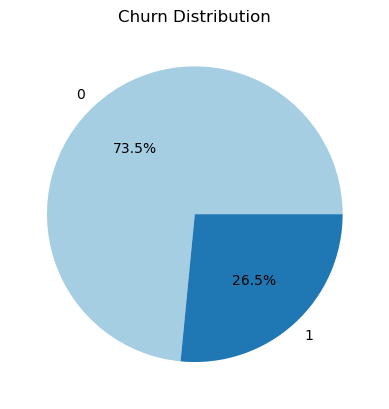

In [15]:
# Count occurrences of each class
class_counts = df['Churn'].value_counts()

print(class_counts)

percentages = (class_counts / len(df)) * 100
# Create pie chart
fig, ax = plt.subplots()
ax.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(percentages))))

ax.set_title('Churn Distribution')

plt.show()

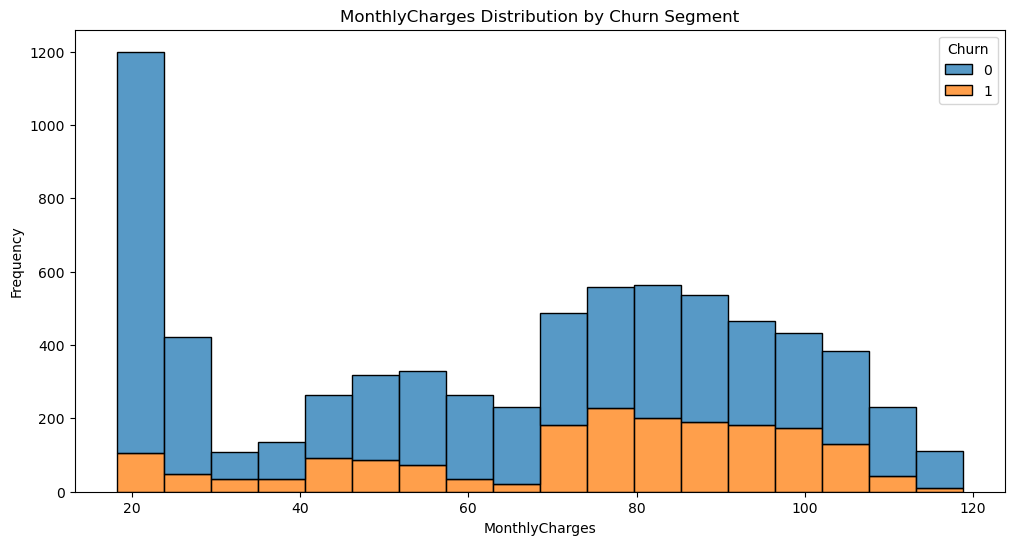

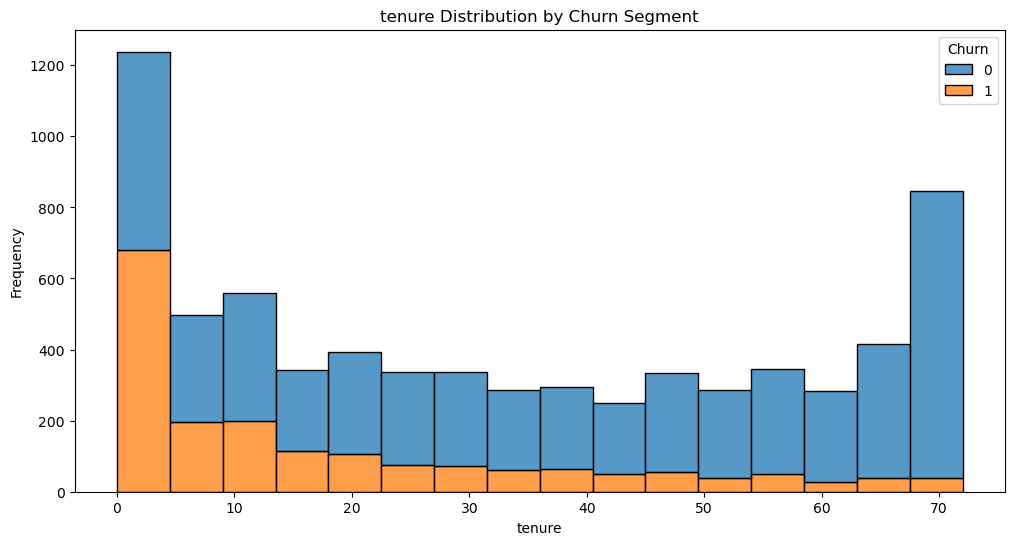

In [16]:
def plot_feature_distributions(df, feature, churn_col='Churn'):
    custom_palette = ['#FFD700', '#003366']
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=feature, hue=churn_col, multiple='stack')
    plt.title(f'{feature} Distribution by Churn Segment')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Example usage
plot_feature_distributions(df, 'MonthlyCharges')
plot_feature_distributions(df, 'tenure')


/var/folders/rk/jdn7ny3s5pz59wz4cb1y33q40000gn/T/ipykernel_50141/174085797.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn_rates = df.groupby('Tenure_Segment')['Churn'].mean()
/var/folders/rk/jdn7ny3s5pz59wz4cb1y33q40000gn/T/ipykernel_50141/174085797.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_churn_rates.index, y=tenure_churn_rates.values, palette='viridis')


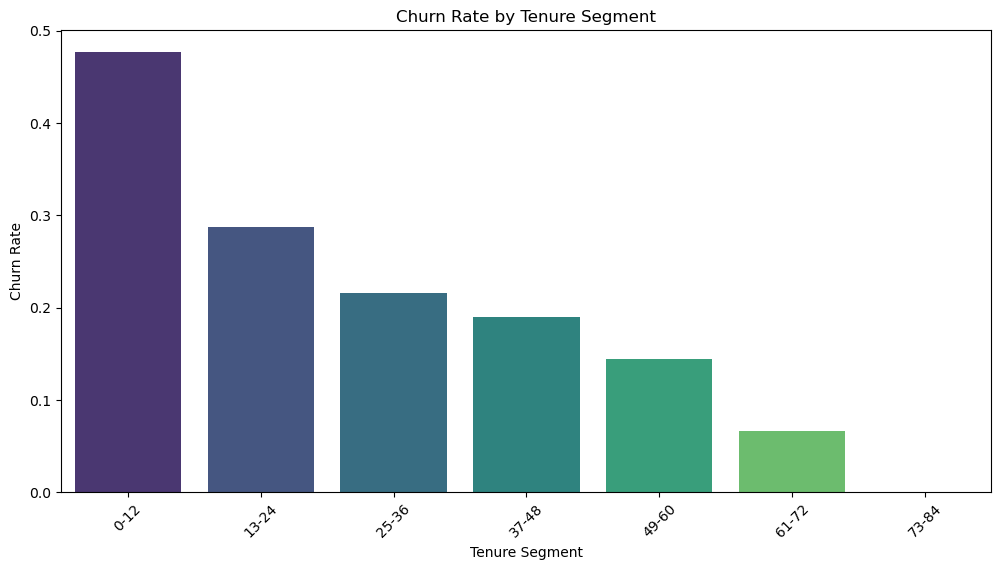

In [17]:
# Create tenure segments
bins = [0, 12, 24, 36, 48, 60, 72, 84]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '73-84']
df['Tenure_Segment'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Calculate churn rates for each segment
tenure_churn_rates = df.groupby('Tenure_Segment')['Churn'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=tenure_churn_rates.index, y=tenure_churn_rates.values, palette='viridis')
plt.xlabel('Tenure Segment')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure Segment')
plt.xticks(rotation=45)
plt.show()

- The churn rate is highest for customers in the 0-12 months segment, meaning new customers are more likely to leave.
- The churn rate decreases as tenure increases, suggesting that longer-tenured customers are less likely to churn.
- The lowest churn rate is observed in the 61-72 segment, indicating strong customer retention at this stage.

/var/folders/rk/jdn7ny3s5pz59wz4cb1y33q40000gn/T/ipykernel_50141/1468208614.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_churn_rates = df.groupby('Charges_Segment')['Churn'].mean()
/var/folders/rk/jdn7ny3s5pz59wz4cb1y33q40000gn/T/ipykernel_50141/1468208614.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charges_churn_rates.index, y=charges_churn_rates.values, palette='magma')


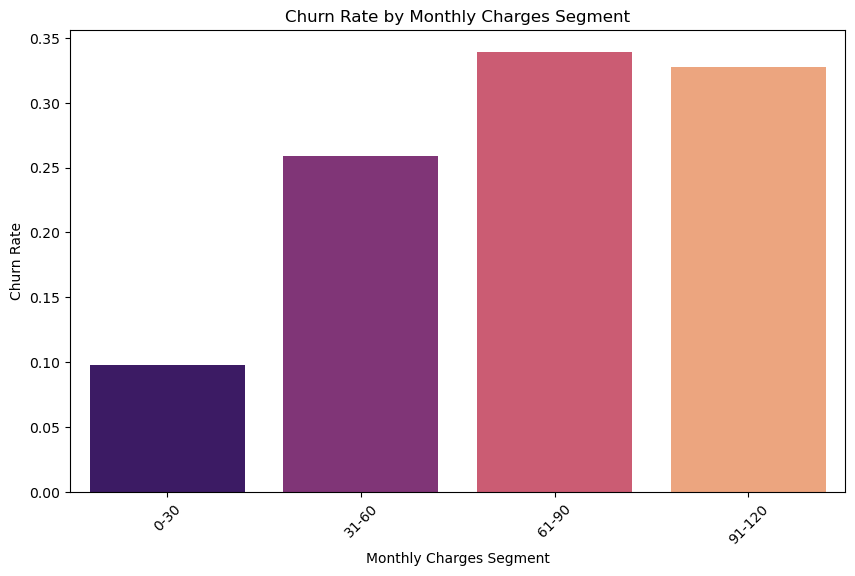

In [18]:
# Create monthly charges segments
bins = [0, 30, 60, 90, 120]
labels = ['0-30', '31-60', '61-90', '91-120']
df['Charges_Segment'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, right=True)

# Calculate churn rates for each segment
charges_churn_rates = df.groupby('Charges_Segment')['Churn'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=charges_churn_rates.index, y=charges_churn_rates.values, palette='magma')
plt.xlabel('Monthly Charges Segment')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Monthly Charges Segment')
plt.xticks(rotation=45)
plt.show()

- The churn rate is lowest for customers with monthly charges between 0-30.
- The churn rate increases significantly for customers with charges in the 31-60 segment and remains high for the 91-120 segment.
- This suggests that as customers' monthly charges increase, their likelihood of churning also increases.

In [19]:
df.drop(columns=['Charges_Segment', 'Tenure_Segment'], inplace=True)

In [20]:
X = df.drop(columns=['Churn'])
y = df['Churn']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Normalize numerical features
scaler = StandardScaler()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

In [21]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}

1. Logistic Regression

Parameters:

- C: Regularization strength. Lower values specify stronger regularization. Testing values like 0.01, 0.1, 1, and 10 helps find a good balance between underfitting and overfitting.
- solver: Algorithm to optimize the logistic regression. Options include 'lbfgs' (an optimization algorithm for large datasets) and 'liblinear' (good for smaller datasets and binary classification).
- Purpose: To adjust the regularization and choose the best optimization algorithm for improving model performance and preventing overfitting.

2. Random Forest

Parameters:

- n_estimators: Number of trees in the forest. More trees usually improve performance but increase computational cost.
- max_depth: Maximum depth of the trees. Helps control overfitting by limiting tree complexity.
- min_samples_split: Minimum number of samples required to split an internal node. Controls the growth of the tree.
- min_samples_leaf: Minimum number of samples required to be at a leaf node. Helps in smoothing the model and preventing overfitting.
- Purpose: To find the optimal number of trees and tree depth, and to control the size and growth of the trees to improve model performance.

3. Support Vector Machine (SVM)

Parameters:

- C: Regularization parameter that controls the trade-off between achieving a low error on the training data and minimizing the model complexity. Values like 0.1, 1, and
- 10 are tested to find the best regularization.
- kernel: Type of kernel function to use. 'linear' is used for linearly separable data, and 'rbf' (radial basis function) is used for non-linear data.
- Purpose: To optimize regularization and choose the right kernel function for the SVM to handle different data distributions effectively.

4. Gradient Boosting

Parameters:

- n_estimators: Number of boosting stages to be run. More stages can improve model performance but can also lead to overfitting.
- learning_rate: Shrinkage parameter that scales the contribution of each tree. Lower values require more trees but can yield a better model.
- max_depth: Maximum depth of the individual trees. Helps in controlling overfitting by limiting the complexity of each tree.
- Purpose: To adjust the number of boosting stages, learning rate, and depth of trees to balance the trade-off between performance and overfitting.

5. K-Nearest Neighbors (KNN)

Parameters:

- n_neighbors: Number of neighbors to use for classification. Testing various numbers helps find the best trade-off between bias and variance.
- weights: Weight function used in prediction. 'uniform' means all neighbors have equal weight, while 'distance' means closer neighbors have more influence.
- Purpose: To determine the optimal number of neighbors and the weighting strategy to achieve the best classification performance.

6. Neural Network

Parameters:

- hidden_layer_sizes: Specifies the number and size of hidden layers in the network. Different configurations can affect the model’s ability to capture complex patterns.
- activation: Activation function for the neurons. 'relu' (rectified linear unit) and 'tanh' (hyperbolic tangent) are common choices.
- solver: Optimization algorithm used for training. 'adam' (adaptive moment estimation) and 'sgd' (stochastic gradient descent) are used based on the convergence speed and stability.
- Purpose: To optimize the network architecture, activation function, and solver for effective training and generalization.

In [22]:
#Evaluate models for 
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        print(f"Training and Evaluating {name}...")

        # Define parameter grid
        if name == 'Logistic Regression':
            param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
        elif name == 'Random Forest':
            param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
        elif name == 'SVM':
            param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
        elif name == 'Gradient Boosting':
            param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7]}
        elif name == 'KNN':
            param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
        elif name == 'Neural Network':
            param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd']}
        
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)
        
        # Get the best model
        best_model = grid_search.best_estimator_
        
        # Predict and evaluate
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1]  # For ROC Curve
        
        results[name] = {
            'best_model': best_model,
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'roc_curve': (roc_curve(y_test, y_prob), auc(roc_curve(y_test, y_prob)[0], roc_curve(y_test, y_prob)[1])),
            'cv_scores': cross_val_score(best_model, X_train, y_train, cv=5),
            'accuracy': accuracy_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
        }
        
        print(f"\n{name} Classification Report:")
        print(results[name]['classification_report'])
        print(f"Cross-Validation Scores for {name}: {results[name]['cv_scores']}")
        print(f"Mean CV Score for {name}: {np.mean(results[name]['cv_scores'])}")
    
    return results
results = evaluate_models(models, X_train_scaled, y_train, X_test_scaled, y_test)


Training and Evaluating Logistic Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.58      0.63       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113

Cross-Validation Scores for Logistic Regression: [0.80324544 0.81845842 0.78701826 0.79411765 0.80730223]
Mean CV Score for Logistic Regression: 0.8020283975659229
Training and Evaluating Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.69      0.52      0.59       574

    accuracy                           0.81      2113


/Users/burcuyesilyurt/opt/anaconda3/envs/main/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/burcuyesilyurt/opt/anaconda3/envs/main/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/burcuyesilyurt/opt/anaconda3/envs/main/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/burcuyesilyurt/opt/anaconda3/envs/main/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached 


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.68      0.55      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Cross-Validation Scores for Neural Network: [0.80730223 0.81237323 0.79107505 0.79006085 0.80425963]
Mean CV Score for Neural Network: 0.8010141987829614


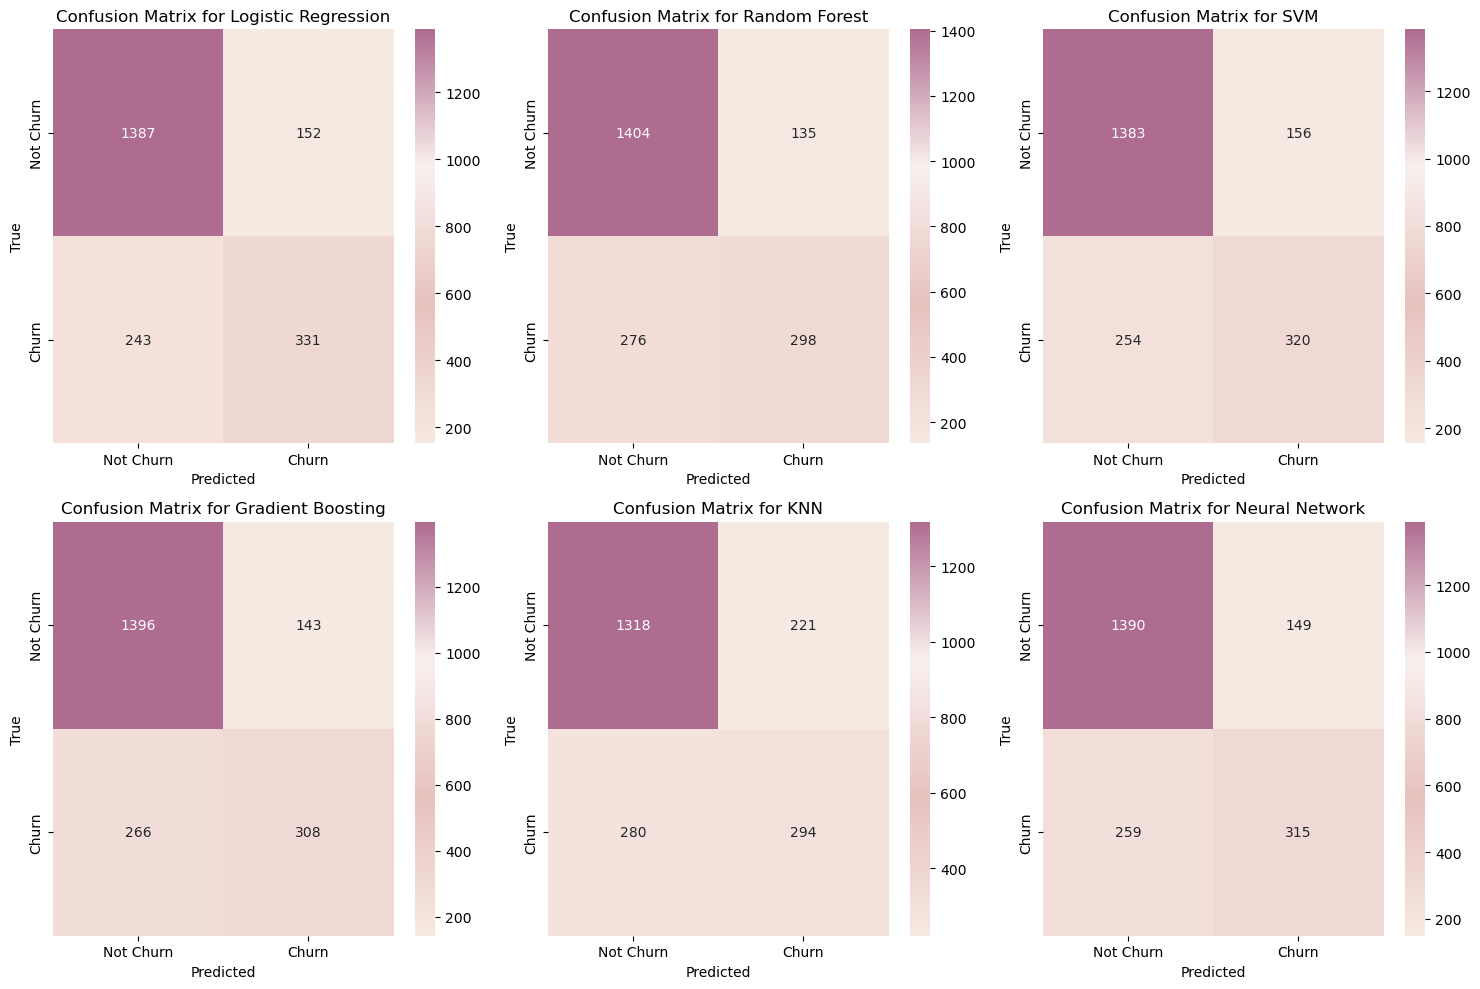

In [23]:
#Plot confusion matrix for all models
def plot_confusion_matrices(results):
    num_models = len(results)
    
    # Determine the grid size for subplots
    num_cols = 3
    num_rows = (num_models + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axs = axs.flatten()

    # Define the custom color map
    colors = ['#f6e9e2', '#e6c1be', '#f9f1ec', '#af6c91']
    cmap = LinearSegmentedColormap.from_list('custom_diverging_cmap', colors, N=256)
    
    
    # Loop through each model's results
    for i, (name, result) in enumerate(results.items()):
        conf_matrix = result['confusion_matrix']
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, 
                    xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=axs[i])
        axs[i].set_title(f'Confusion Matrix for {name}')
        axs[i].set_xlabel('Predicted')
        axs[i].set_ylabel('True')
    
    # Turn off any unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to plot the confusion matrices
plot_confusion_matrices(results)

/var/folders/rk/jdn7ny3s5pz59wz4cb1y33q40000gn/T/ipykernel_50141/2162221073.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', ax=axs[i])
/var/folders/rk/jdn7ny3s5pz59wz4cb1y33q40000gn/T/ipykernel_50141/2162221073.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', ax=axs[i])


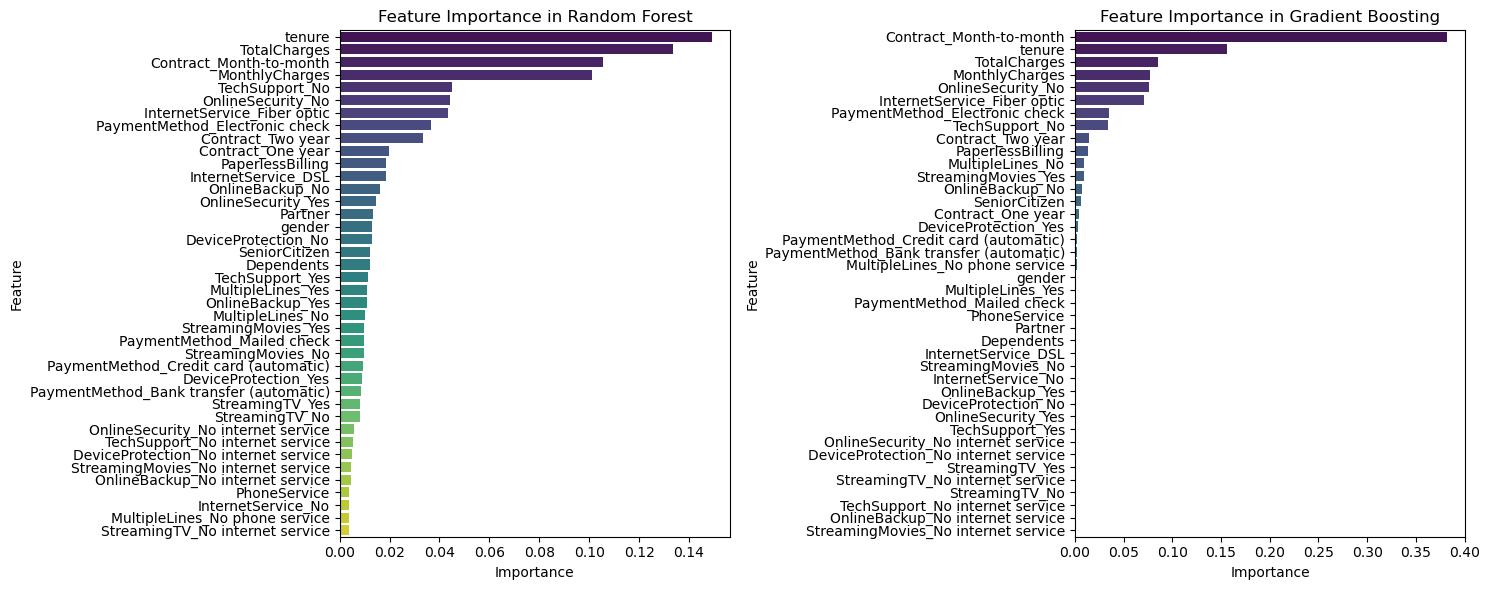

In [24]:
#Plot feature importance
def plot_feature_importance(results, X_columns):
    # Filter for models that have feature importance
    importance_models = [name for name in results if name in ['Random Forest', 'Gradient Boosting']]
    
    # Create a figure with one row and as many columns as there are importance plots
    num_plots = len(importance_models)
    fig, axs = plt.subplots(1, num_plots, figsize=(15, 6))
    
    # Flatten the axes array if there is only one plot
    if num_plots == 1:
        axs = [axs]

    for i, name in enumerate(importance_models):
        # Get the model and its feature importances
        feature_importances = results[name]['best_model'].feature_importances_
        importance_df = pd.DataFrame({'Feature': X_columns, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        
        # Plot feature importance
        sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', ax=axs[i])
        axs[i].set_title(f'Feature Importance in {name}')
        axs[i].set_xlabel('Importance')
        axs[i].set_ylabel('Feature')
    
    plt.tight_layout()
    plt.show()


plot_feature_importance(results, X.columns)

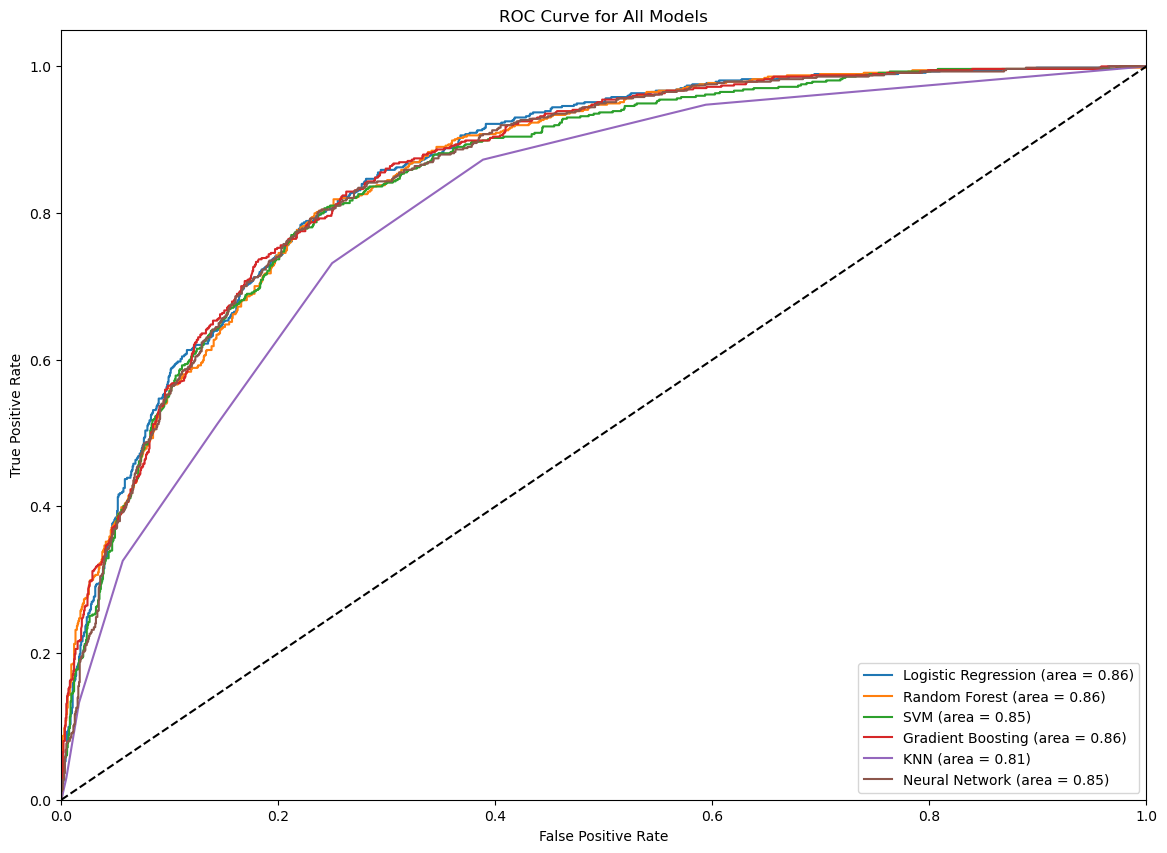

In [25]:
#Plot roc curves for all models
def plot_roc_curves(results):
    fig, ax = plt.subplots(figsize=(14, 10))

    for name, result in results.items():
        fpr, tpr, _ = result['roc_curve'][0]
        roc_auc = result['roc_curve'][1]
        ax.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
    
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve for All Models')
    ax.legend(loc='lower right')

    plt.show()

plot_roc_curves(results)


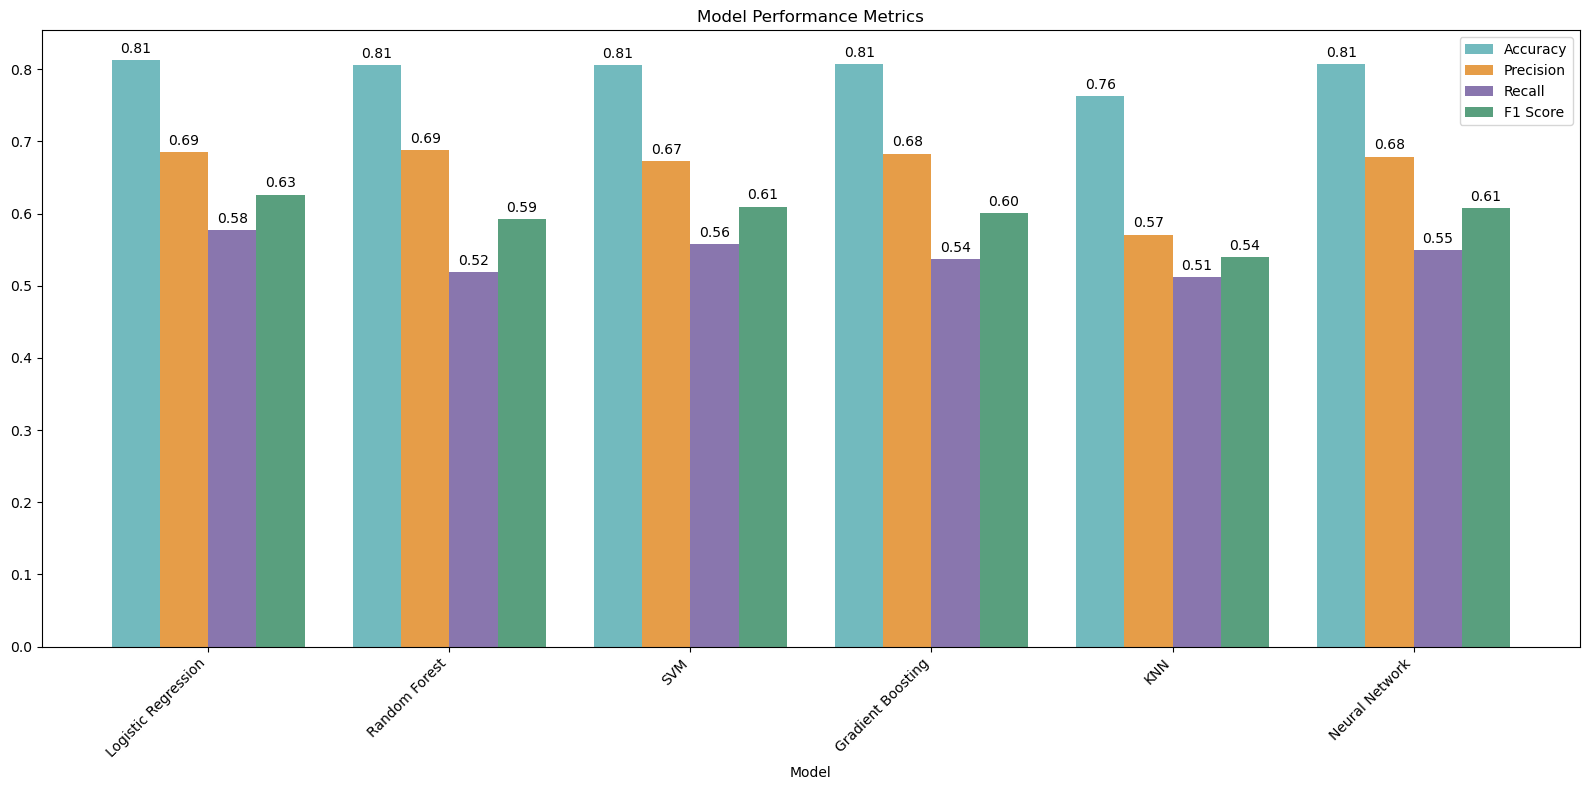

In [26]:
def plot_model_performance(results):
    model_names = list(results.keys())
    
    # Extract metrics
    accuracies = [results[name]['accuracy'] for name in model_names]
    precisions = [results[name]['precision'] for name in model_names]
    recalls = [results[name]['recall'] for name in model_names]
    f1_scores = [results[name]['f1_score'] for name in model_names]

    x = np.arange(len(model_names))  # The label locations
    width = 0.2  # The width of the bars

    fig, ax = plt.subplots(figsize=(16, 8))
    bars1 = ax.bar(x - 1.5 * width, accuracies, width, label='Accuracy', color='#72babe')
    bars2 = ax.bar(x - 0.5 * width, precisions, width, label='Precision', color='#e69d48')
    bars3 = ax.bar(x + 0.5 * width, recalls, width, label='Recall', color='#8976ae')
    bars4 = ax.bar(x + 1.5 * width, f1_scores, width, label='F1 Score', color='#599f7e')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Model')
    ax.set_title('Model Performance Metrics')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    ax.legend()

    # Add labels above the bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_labels(bars1)
    add_labels(bars2)
    add_labels(bars3)
    add_labels(bars4)

    plt.tight_layout()
    plt.show()

plot_model_performance(results)

- Best Models: Logistic Regression, SVM, and Neural Network show the best overall performance with high accuracy and consistent cross-validation scores. They are effective at predicting churn but have a similar balance of precision and recall.
- Feature Focus: All models demonstrate a similar pattern in handling churn predictions, so focusing on feature engineering and selection may enhance model performance.
- Model Selection: For practical purposes, Logistic Regression or SVM could be preferred due to their interpretability and relatively high performance. Neural Networks, while also performing well, can be more complex to tune and interpret.


In summary, Logistic Regression and SVM are strong candidates for deployment based on their balance of precision, recall, and overall accuracy.

In [27]:
# Segmentation: Predict and count churn likelihood
def churn_segmentation(best_model, df):
    df['Churn_Prediction'] = best_model.predict(df.drop(columns=['Churn']))
    churn_counts = df['Churn_Prediction'].value_counts()
    return churn_counts

In [28]:
def select_best_model(results, metric='f1_score'):
    # Create a DataFrame from the results dictionary
    metrics_df = pd.DataFrame({
        'Model': results.keys(),
        'Accuracy': [results[model]['accuracy'] for model in results],
        'Precision': [results[model]['precision'] for model in results],
        'Recall': [results[model]['recall'] for model in results],
        'F1 Score': [results[model]['f1_score'] for model in results],
        'AUC-ROC': [results[model]['roc_curve'][1] for model in results],
        'Mean CV Score': [np.mean(results[model]['cv_scores']) for model in results]
    })

    print("Available metrics:", metrics_df.columns)

    # Check if the specified metric is in the DataFrame columns
    if metric not in metrics_df.columns:
        raise ValueError(f"Metric '{metric}' is not available in the DataFrame. Available metrics are: {list(metrics_df.columns)}")

    # Sort models based on the selected metric
    best_model = metrics_df.sort_values(by=metric, ascending=False).iloc[0]
    
    print(f"Best Model based on {metric}:")
    print(best_model)

    return best_model['Model']

# Example of selecting the best model based on F1 Score
best_model_name = select_best_model(results, metric='F1 Score')  # Ensure metric name matches
print(f"\nBest Model: {best_model_name}")

# Use the best model to segment churn
best_model = results[best_model_name]['best_model']
churn_segments = churn_segmentation(best_model, df)
print("\nChurn Segmentation Counts:\n", churn_segments)


Available metrics: Index(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC',
       'Mean CV Score'],
      dtype='object')
Best Model based on F1 Score:
Model            Logistic Regression
Accuracy                    0.813062
Precision                     0.6853
Recall                      0.576655
F1 Score                    0.626301
AUC-ROC                     0.858773
Mean CV Score               0.802028
Name: 0, dtype: object

Best Model: Logistic Regression

Churn Segmentation Counts:
 Churn_Prediction
1    6428
0     615
Name: count, dtype: int64


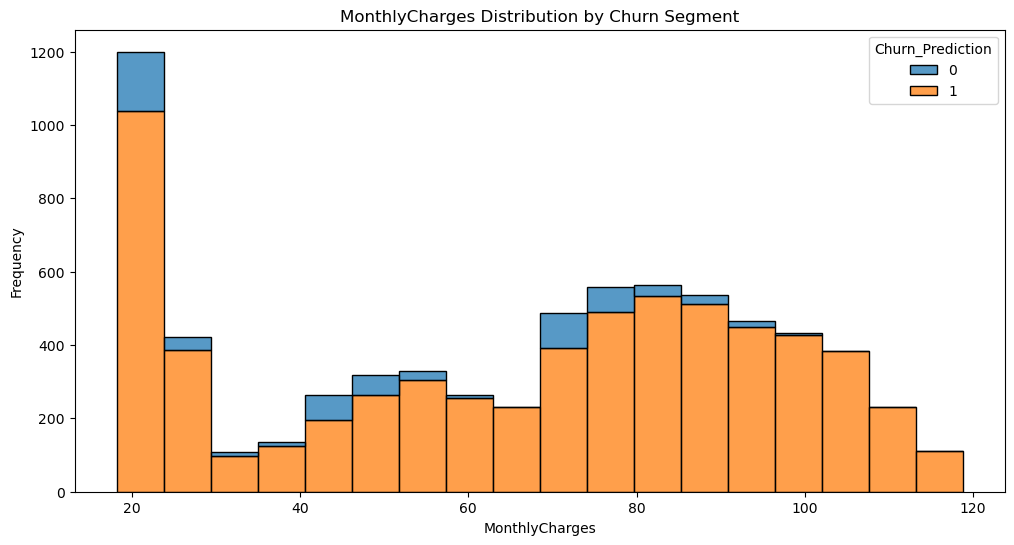

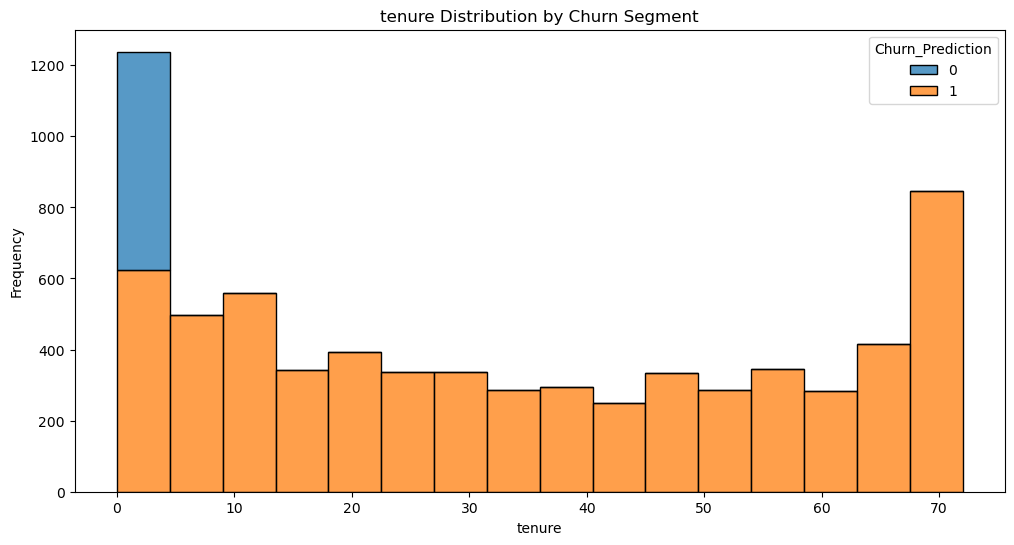

[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.3s
[CV] END ...................................C=10, kernel=rbf; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=5, 

In [29]:
plot_feature_distributions(df, 'MonthlyCharges','Churn_Prediction')
plot_feature_distributions(df, 'tenure', 'Churn_Prediction')